# Problem Statement

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, which is a boring and time-consuming task. 
Some other measurements like Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, which are easie to obtain, will be used to predict the rings and age of Abalone.

# Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Import Abalone DataSet

In [2]:
#import data set https://github.com/dsrscientist/dataset1/blob/master/abalone.csv
df = pd.read_csv('abalone.csv')
df.head() #first 5 rows of abalone data set

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Rename the dataset Columns

In [3]:
#lets assign some short names to the columns for easy reference
# Sex => sex
# length => len
# Diameter => dia
# Height => height
# whole weight => wwt
# Shucked weight => shuwt
# Viscera weight => vwt
# Shell weight => shelwt
# Rings => rings

df.rename(columns = {'Sex':'sex', 'Length':'len','Diameter':'dia', 'Height':'height', 'Whole weight':'w_wt', 'Shucked weight':'shu_wt', 'Viscera weight':'v_wt', 'Shell weight':'shel_wt', 'Rings':'rings'}, inplace = True)
df.head()

,sex,len,dia,height,w_wt,shu_wt,v_wt,shel_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Discriptive Analysis

In [4]:
df.columns

Index(['sex', 'len', 'dia', 'height', 'w_wt', 'shu_wt', 'v_wt', 'shel_wt',
       'rings'],
      dtype='object')

Description - Data is divided into 7 columns
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      4177 non-null   object 
 1   len      4177 non-null   float64
 2   dia      4177 non-null   float64
 3   height   4177 non-null   float64
 4   w_wt     4177 non-null   float64
 5   shu_wt   4177 non-null   float64
 6   v_wt     4177 non-null   float64
 7   shel_wt  4177 non-null   float64
 8   rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Observation - 
- There are total 8 Fetaure Variable in which Sex is of categorical type and rest are Float Type Numerical data
- Target Variable (ie) Rings is of Integer type Numerical Data
- There are total 4177 entries is this dataset which is a good number

In [6]:
df.describe(include='all')

,sex,len,dia,height,w_wt,shu_wt,v_wt,shel_wt,rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


Observation-
- Sex - This column contains categorical data , having 3 unique values in which M category has highest frequency 1528
- Length - Float Datatype, min length = 0.075, max length = 0.815, average length = 0.52 and 50% test data have length below 0.54
- Diameter - Float Datatype, min dia = 0.055, max dia = 0.65, average diameter = 0.40 and 50% test data have diameter below 0.425
- Height - Float Datatype, min height = 0.0, max height = 1.13, avg height = 0.14 and 50% test data have height below 0.14
- Whole weight - Float Datatype, min weight = 0.002, max weight = 2.83, avg weight = 0.82 and 50% test data have weight below 0.80
- Shucked Weight - FLoat data type, min weight = 0.001, max weight = 1.49, avg weight = 0.36 and 50% test data have weight below 0.34
- Viscera Weight - FLoat data type, min weight = 0.000, max weight = 0.76, avg weight = 0.18 and 50% test data have weight below 0.17
- Shell Weight - FLoat data type, min weight = 0.001, max weight = 1.005, avg weight = 0.24 and 50% test data have weight below 0.23
- Rings - Integer data type, min = 1.0, max = 29, avg = 10 and 50% test data have rings below 9

# Null Value Analysis

In [7]:
df.isnull().sum()

sex        0
len        0
dia        0
height     0
w_wt       0
shu_wt     0
v_wt       0
shel_wt    0
rings      0
dtype: int64

Observation - There is no Null Data throughout the dataset, hence imputation not required.

# Zero Value Analysis

In [8]:
(df==0).sum()

sex        0
len        0
dia        0
height     2
w_wt       0
shu_wt     0
v_wt       0
shel_wt    0
rings      0
dtype: int64

In [9]:
#as per the above results Height Column contains 2 entries as '0', 
#lets explore what values other features carry against that  

df[df['height']==0]

,sex,len,dia,height,w_wt,shu_wt,v_wt,shel_wt,rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [10]:
#we can clearly see under such case height can not be zero, as no. of rings in these 2 cases are either 8 or 6, so there should be some value at height also
#lets replace height for these two cases with the mean value

df['height']=df['height'].replace(0,df['height'].mean())
df.describe()

,len,dia,height,w_wt,shu_wt,v_wt,shel_wt,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation: Now we can see there is no minimum zero value throughout the data set

# Drop Duplicate Data

In [11]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      4177 non-null   object 
 1   len      4177 non-null   float64
 2   dia      4177 non-null   float64
 3   height   4177 non-null   float64
 4   w_wt     4177 non-null   float64
 5   shu_wt   4177 non-null   float64
 6   v_wt     4177 non-null   float64
 7   shel_wt  4177 non-null   float64
 8   rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


Observation - As the number of rows are still 4177, so there was no duplicate data in the dataset

# Interpreting Relationship between Features and Target Variable

In [13]:
#separating the Features and Target Variable
x = df.drop(columns = ['rings'])
y = df['rings']

# Analysing Target Variable (Rings)

In [14]:
y.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [15]:
y.nunique()

28

Observation - There are 28 unique discrete values of rings (target) avaliable.

In [16]:
y.value_counts() #representing the frequency of all 28 unique entries under target column 

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: rings, dtype: int64

<AxesSubplot:xlabel='rings', ylabel='count'>

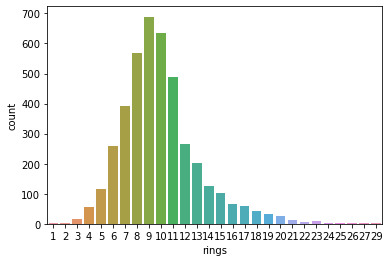

In [17]:
sns.countplot(y) #plotting the count for each unique entry under target variable

Observation - The distribution is right skewed. The largest number of data carries rings between the range (5,15)

# Analysing Feature Variables

Lets start with analysing the categorical Feature (ie) Sex

In [18]:
x['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Observation - There are unique entries in sex column - Male(M), Female(F), Infant(I)

In [19]:
#lets count for unique values
x['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

Observation - There are 1528 Male, 1342 Female and 1307 Infant Abalone in this dataset

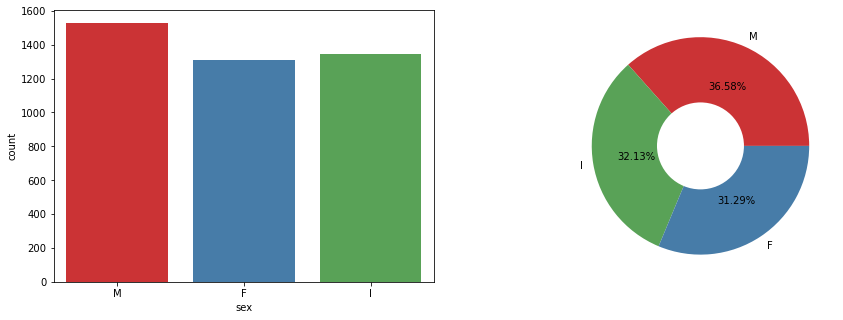

In [20]:
#lets plot the Sex count
plt.figure(figsize=(15,5))
colors = ['#cb3335','#59a257','#477ca8',]

plt.subplot(1,2,1)
sns.countplot(x['sex'], palette="Set1")

plt.subplot(1,2,2)
labels = 'M','I','F'
plt.pie(x['sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 36.58% of data is of Males, 32.12% is for Infants and 31.29% is for Females 

# Analysing the variation of Target(Rings) wrt all Features

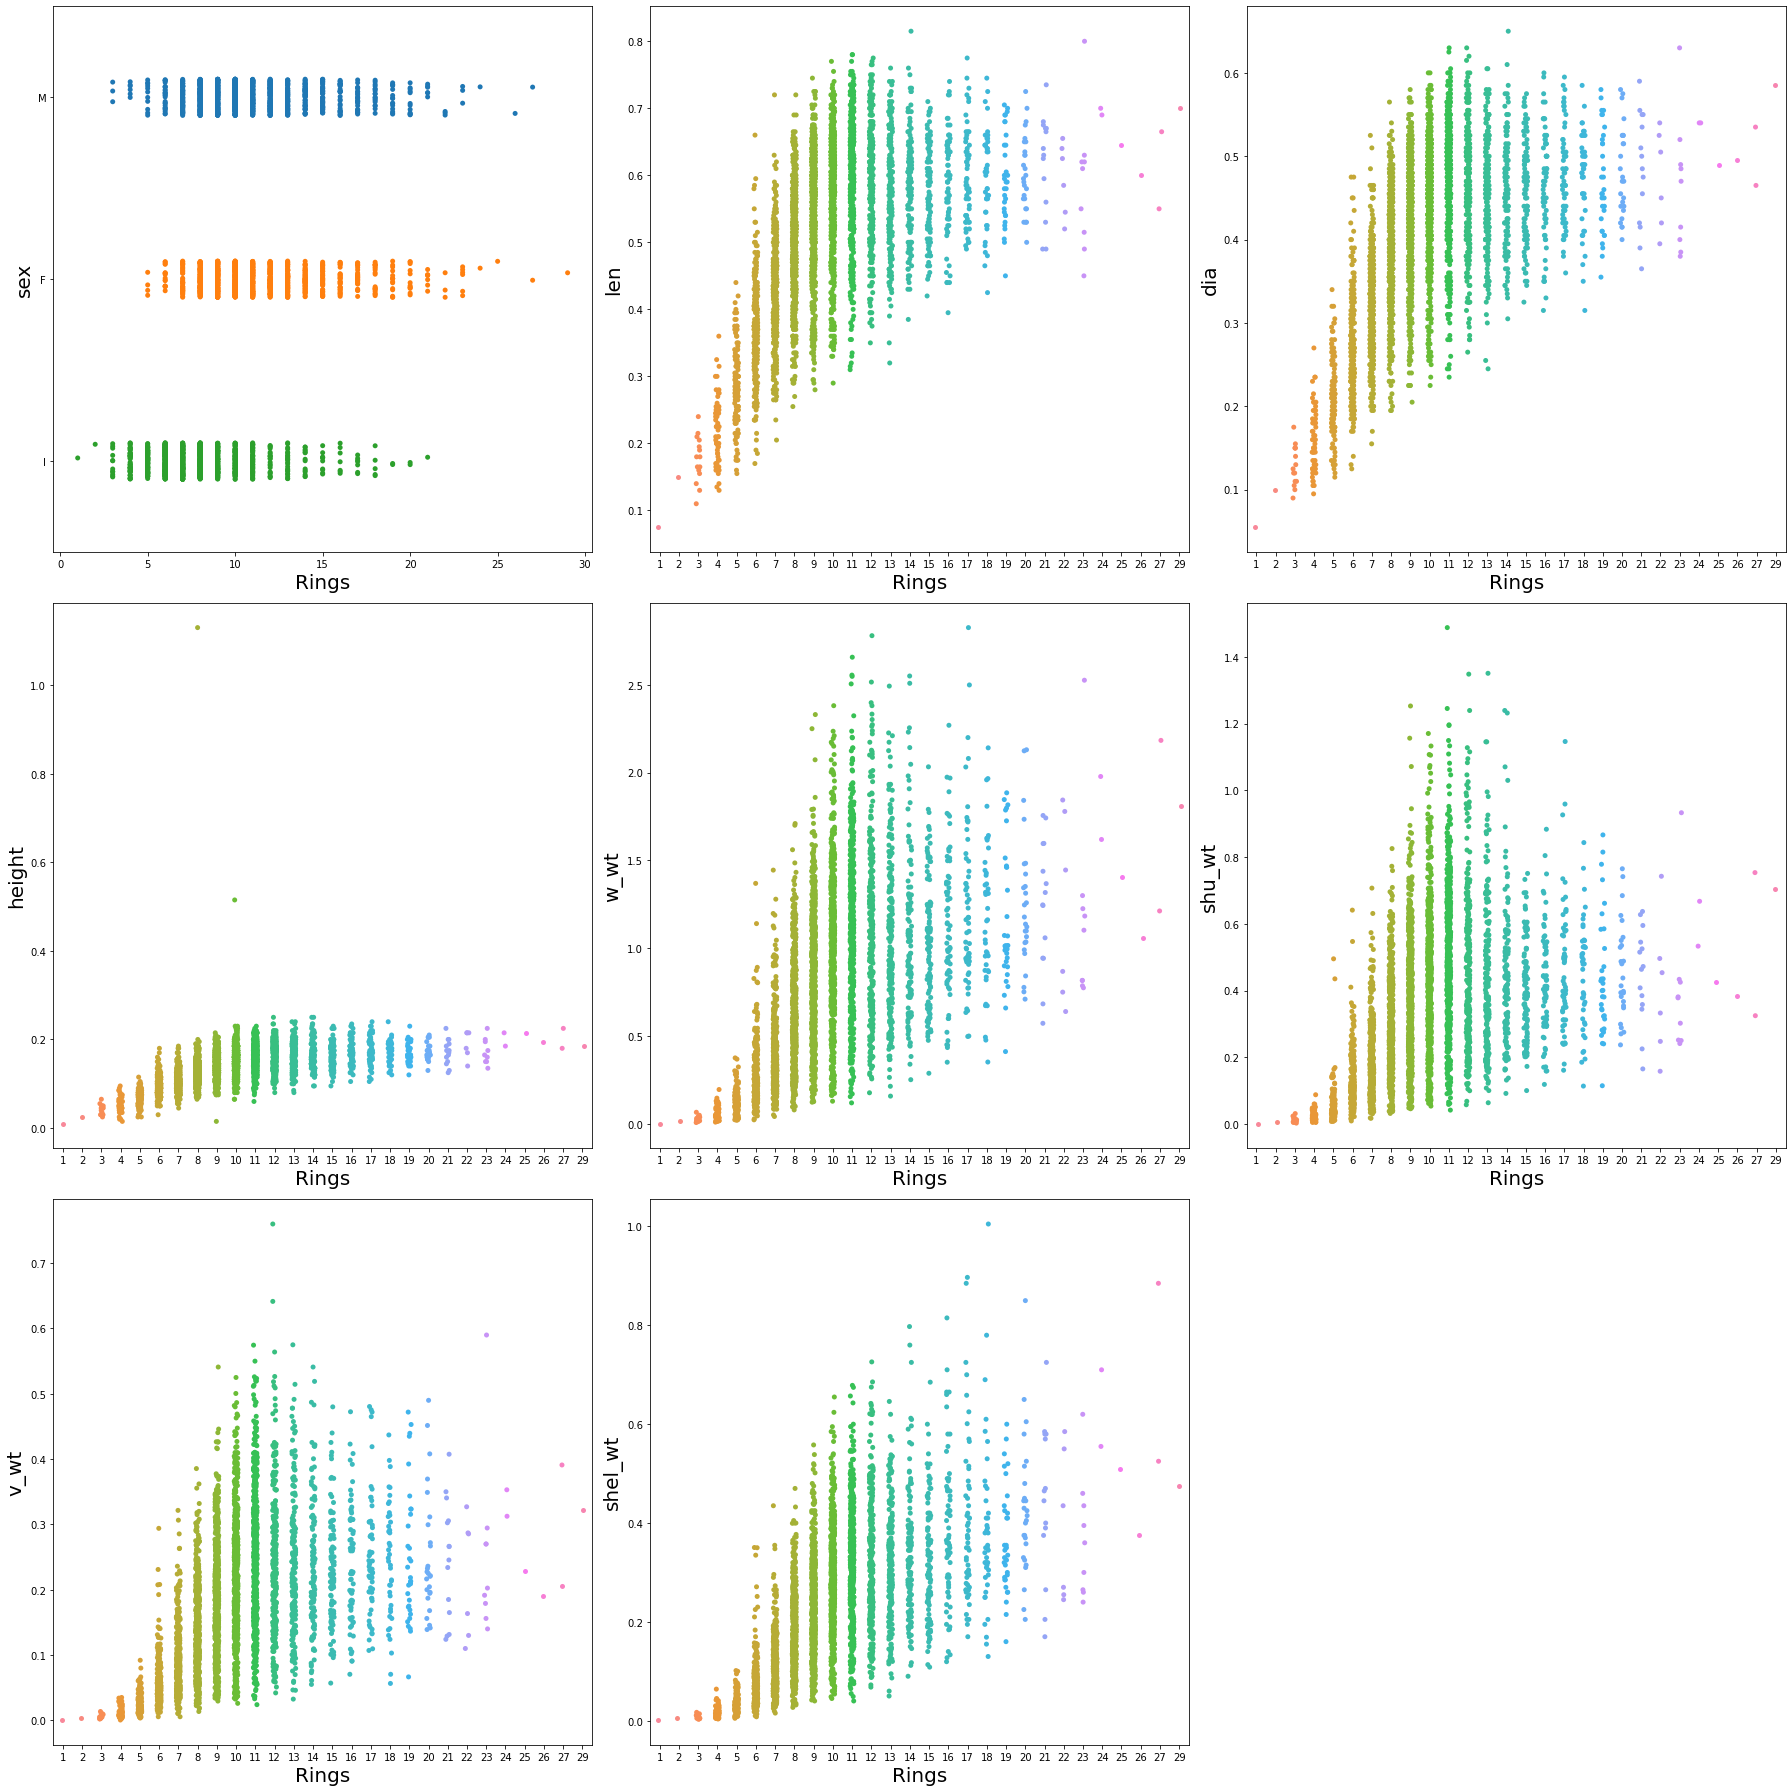

In [21]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation - 
- Larger number of rings are detected in males and females. Infants have comparatively less number of rings
- As the length, diameter, height and the weight of the abalone increases, no. of rings increases

# Plotting the Relation again, putting Sex as a hue

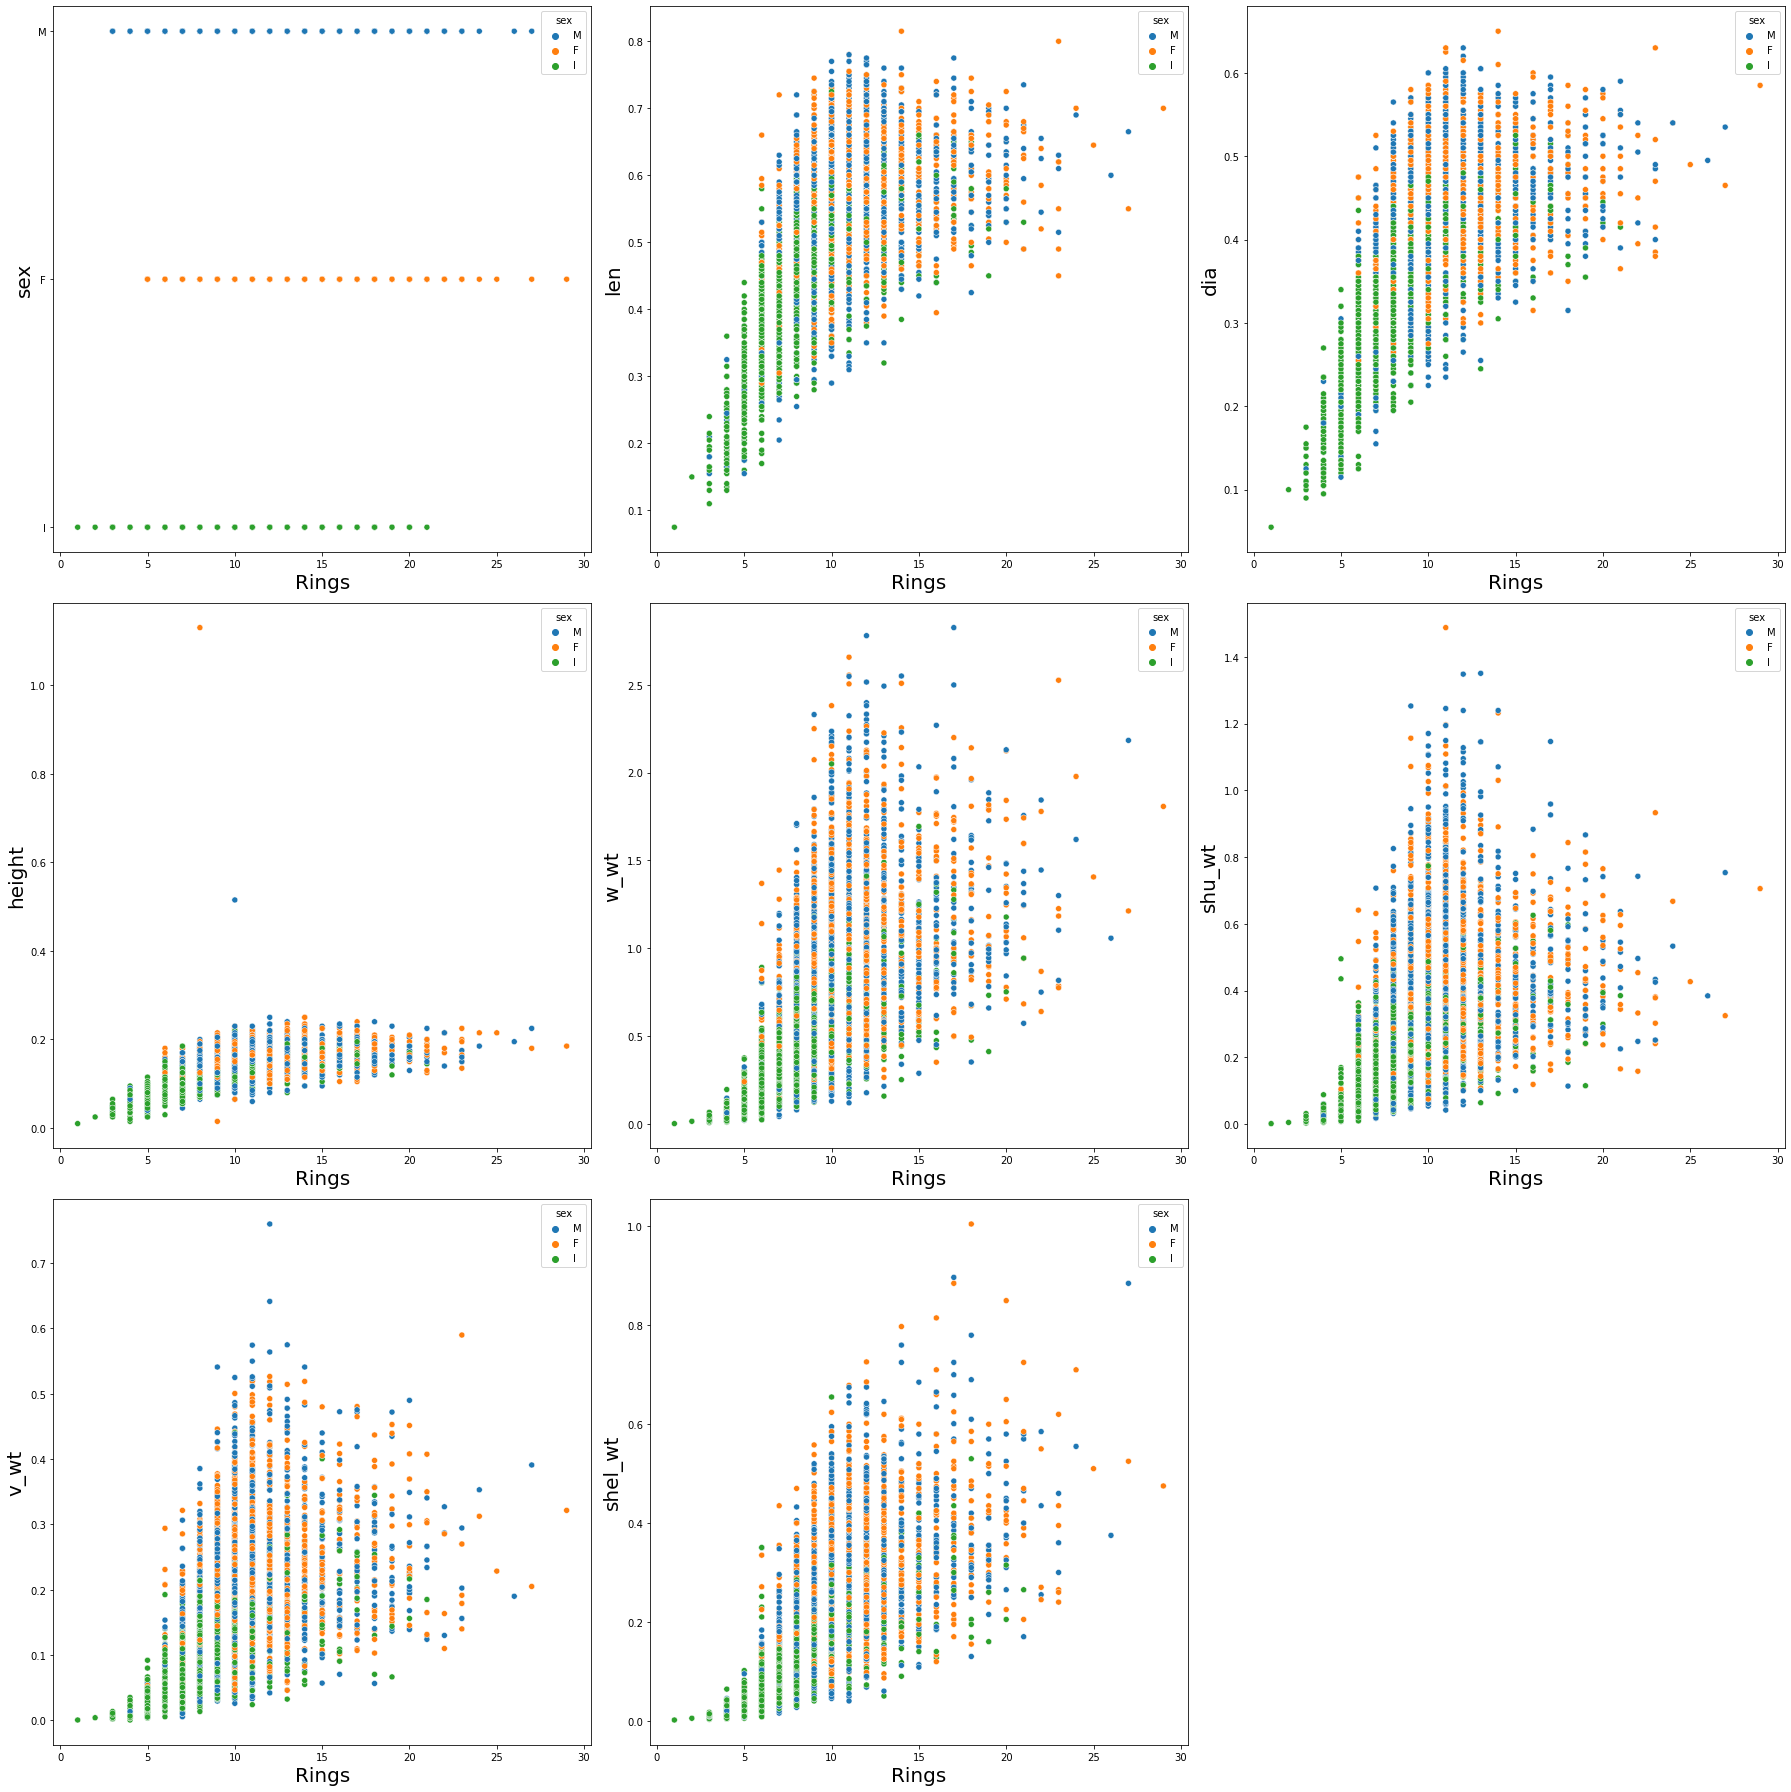

In [22]:
#plot with sex as a hue to the data
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.scatterplot(y,x[col], hue=x['sex'])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation - Infant carries less height, length, diameter, weight and no. of rings as compared to Male and Female

# Visualizing all data together

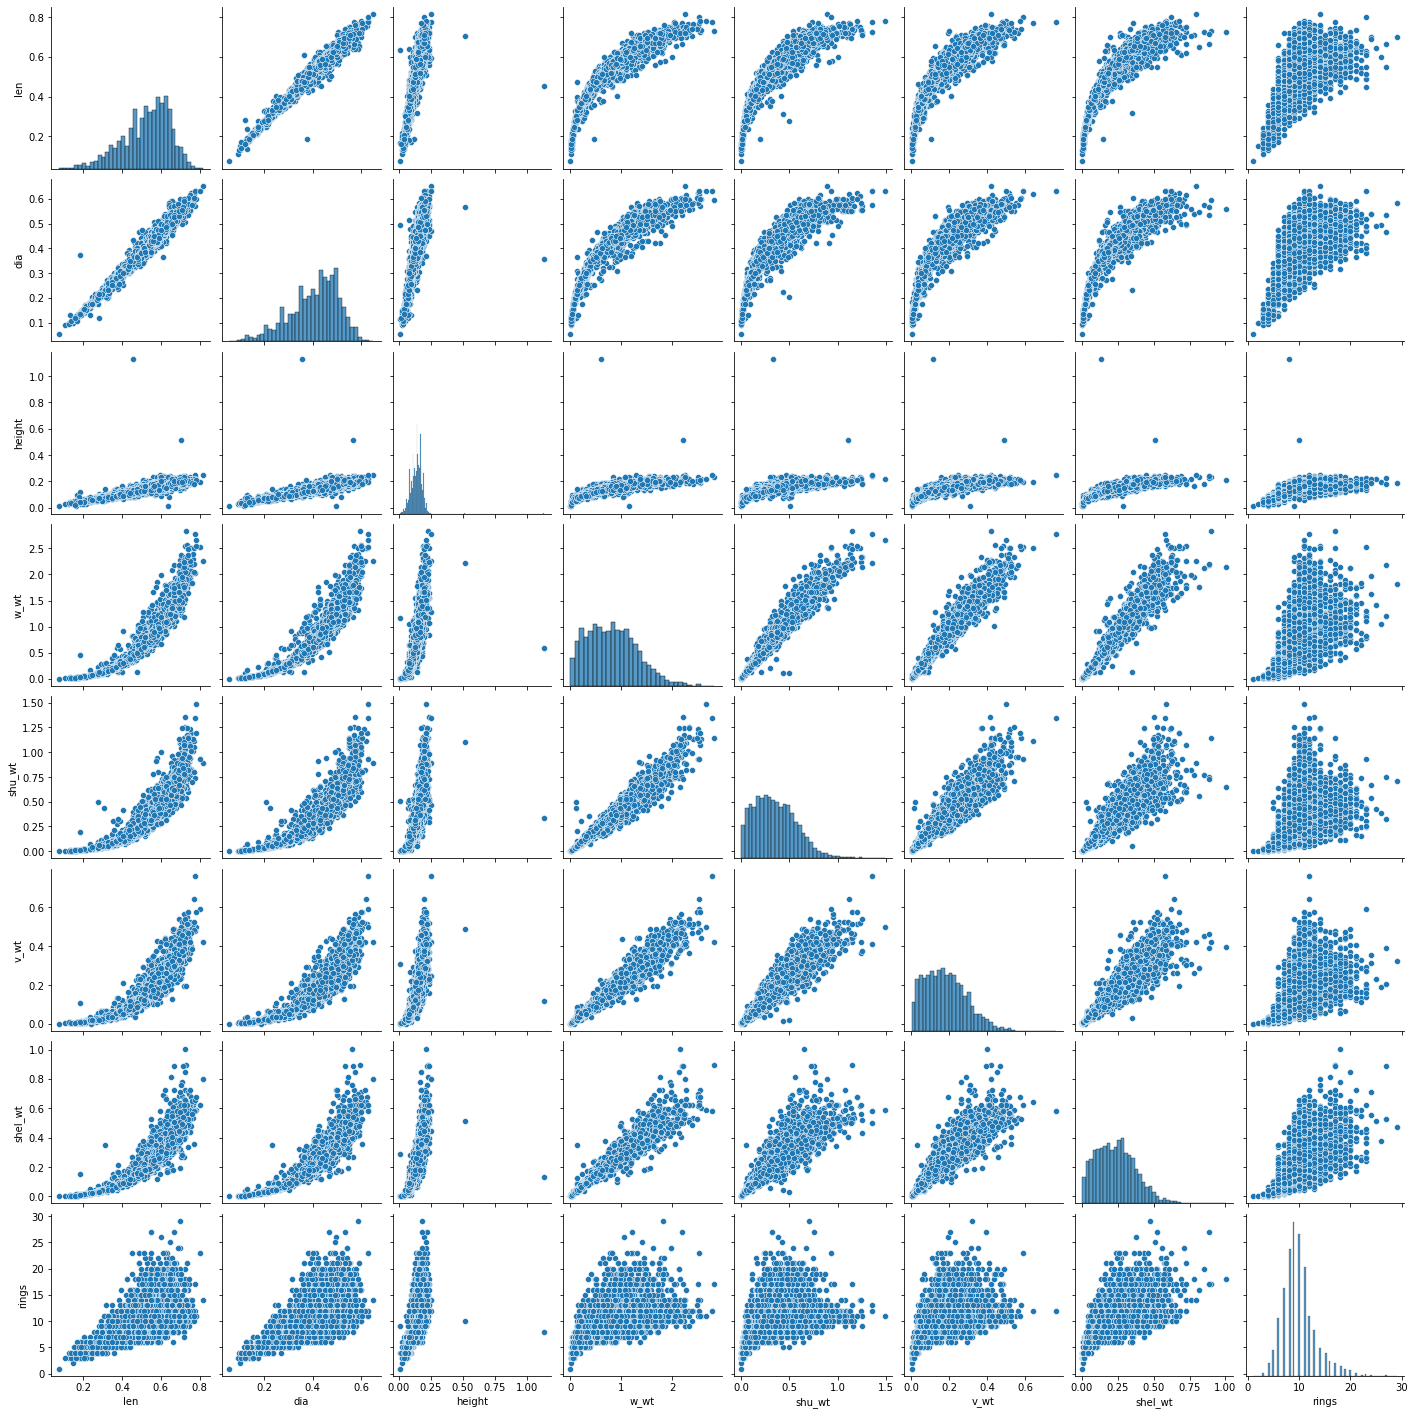

In [23]:
sns.pairplot(df)

Observation - Length, Diameter and height have a linear relationship with no. of rings while the weight have exponential realtionship with no.of rings. The presence of outliers can also be seen in all the features. There is the presence of skewness also.

# One Hot Encoding to encode Categorical Data

choosing one hot encoding over label encoding for converting categorical data to numerical data bacause Label encoding was introducing very high VIF

In [24]:
dummy = pd.get_dummies(df['sex'],drop_first = False)
df_enc = df.join(dummy)
df_enc.drop(columns = ['sex'],axis = 1, inplace = True)
df_enc

,len,dia,height,w_wt,shu_wt,v_wt,shel_wt,rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


Categorical data has been encoded using one hot encoding

# Correlation

In [25]:
#lets find out the correlation between the columns
df_enc.corr()

,len,dia,height,w_wt,shu_wt,v_wt,shel_wt,rings,F,I,M
len,1.000000,0.986812,0.827748,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
dia,0.986812,1.000000,0.833931,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
height,0.827748,0.833931,1.000000,0.819624,0.775406,0.798653,0.819455,0.557502,0.298139,-0.517612,0.214819
w_wt,0.925261,0.925452,0.819624,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
shu_wt,0.897914,0.893162,0.775406,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
v_wt,0.903018,0.899724,0.798653,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
shel_wt,0.897706,0.905330,0.819455,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
rings,0.556720,0.574660,0.557502,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
F,0.309666,0.318626,0.298139,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
I,-0.551465,-0.564315,-0.517612,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


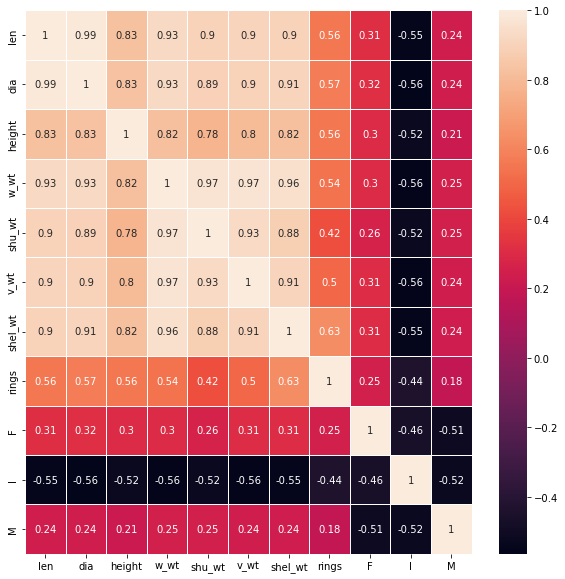

In [26]:
#lets plot the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_enc.corr(),annot=True,linewidth=1)
plt.show()

Observations - All the feature variables are highly correlated to each other, which will cause multicollinearity issue

In [27]:
#lets find out the correlation of Feature variables with target variable 
df_enc.corr()['rings'].sort_values()

I         -0.436063
M          0.181831
F          0.250279
shu_wt     0.420884
v_wt       0.503819
w_wt       0.540390
len        0.556720
height     0.557502
dia        0.574660
shel_wt    0.627574
rings      1.000000
Name: rings, dtype: float64

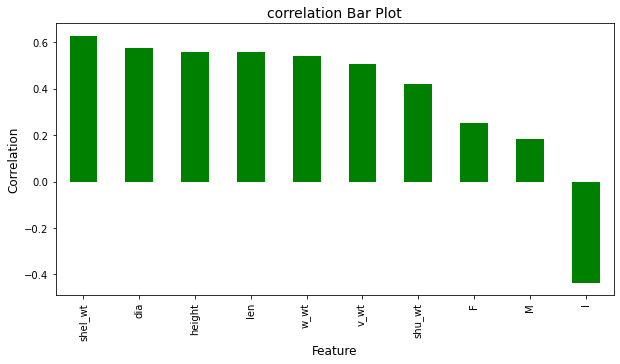

In [28]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df_enc.corr()['rings'].sort_values(ascending=False).drop(['rings']).plot(kind='bar' ,color='g')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation- 
- shell weight, diameter, height, length, whole weight, viscera weight have a strong bond with no. of rings
- shucked weight has a good bond
- Male and Female have some good +ve correlation with no. of rings with Infant has -ve correlation.


# Detecting Multicollinearity with VIF and Data Cleaning

Observed using heatmap that feature variables are highly collinear. Detecting multicollinearlity using VIF Score

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = df_enc.columns
vif_data["VIF"] = [variance_inflation_factor(df_enc.values, i) for i in range(len(df_enc.columns))]
print(vif_data)

    feature         VIF
0       len   40.945241
1       dia   42.625093
2    height    3.640045
3      w_wt  113.825300
4    shu_wt   32.574143
5      v_wt   17.735112
6   shel_wt   21.638308
7     rings    2.163228
8         F   24.102226
9         I   20.519087
10        M   26.978947


VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

Observation-
- As VIF score for whole weight is quite high, Lets drop that column and check VIF again

In [30]:
# VIF dataframe
vif_data1 = pd.DataFrame()

#drop the yrs.since.phd variable
df_enc.drop(['w_wt'],axis=1, inplace=True)

vif_data1["feature"] = df_enc.columns
vif_data1["VIF"] = [variance_inflation_factor(df_enc.values, i) for i in range(len(df_enc.columns))]
print(vif_data1)

   feature        VIF
0      len  40.941203
1      dia  42.623373
2   height   3.639243
3   shu_wt  10.240698
4     v_wt  10.863544
5  shel_wt   9.378135
6    rings   2.085567
7        F  23.995763
8        I  20.393190
9        M  26.845468


Observation-
- As diameter also has high VIF score lets drop that too

In [31]:
# VIF dataframe
vif_data2 = pd.DataFrame()

#drop the yrs.since.phd variable
df_enc.drop(['dia'],axis=1, inplace=True)

vif_data2["feature"] = df_enc.columns
vif_data2["VIF"] = [variance_inflation_factor(df_enc.values, i) for i in range(len(df_enc.columns))]
print(vif_data2)

   feature        VIF
0      len   8.234018
1   height   3.605474
2   shu_wt  10.223813
3     v_wt  10.847754
4  shel_wt   9.143164
5    rings   2.072317
6        F  23.983724
7        I  20.389842
8        M  26.839514


Observation - VIF score is under control now but not for encoded sex columns. Tried dropping one of the encoded columns and testing the VIF result but that was not giving the expected results, hence proceeding with the current score.

# Skewness

In [32]:
#lets prepare the final data set first before testing skewness, as this can't be tested on categorical data
df.drop(columns = ['w_wt','dia','sex'],axis=1, inplace=True)
df.skew()

len       -0.639873
height     3.167124
shu_wt     0.719098
v_wt       0.591852
shel_wt    0.620927
rings      1.114102
dtype: float64

Observation-

- The acceptable skewness range is +/- 0.5, height and rings has high skewness while shell weight, length and shucked weight has little skewness involved.

# Distribution curve

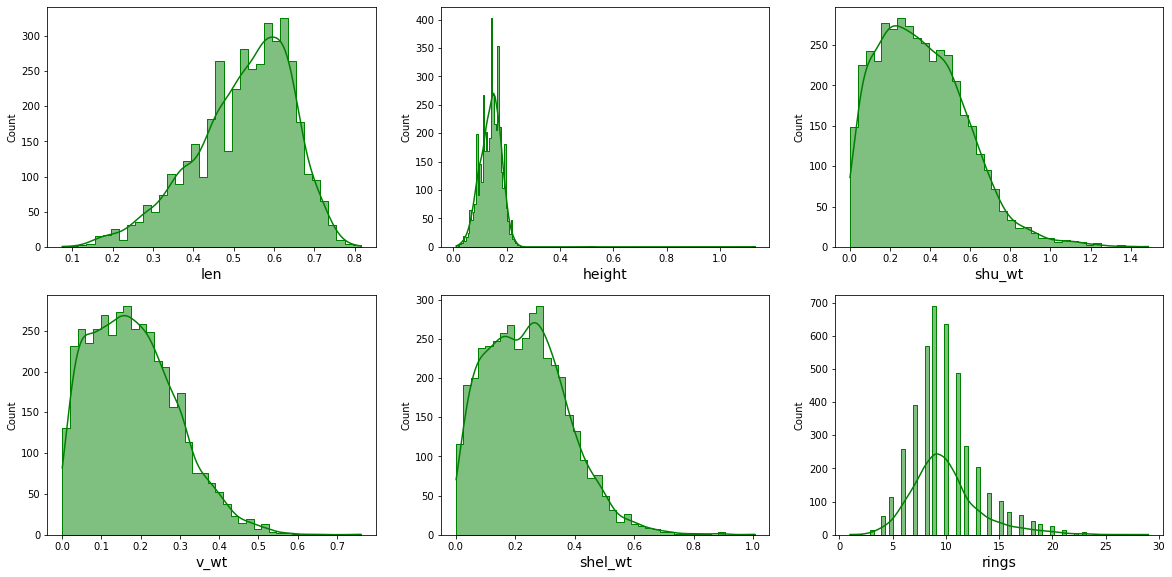

In [33]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=6:
        plt.subplot(3,3,plotnum)
        sns.histplot(df[col], color = 'g', kde=True, element='step')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - There is considerable amount of skewness in all feature variables and target. we need to treat it but first of all we need to check outliers and remove that.

# Checking Outliers

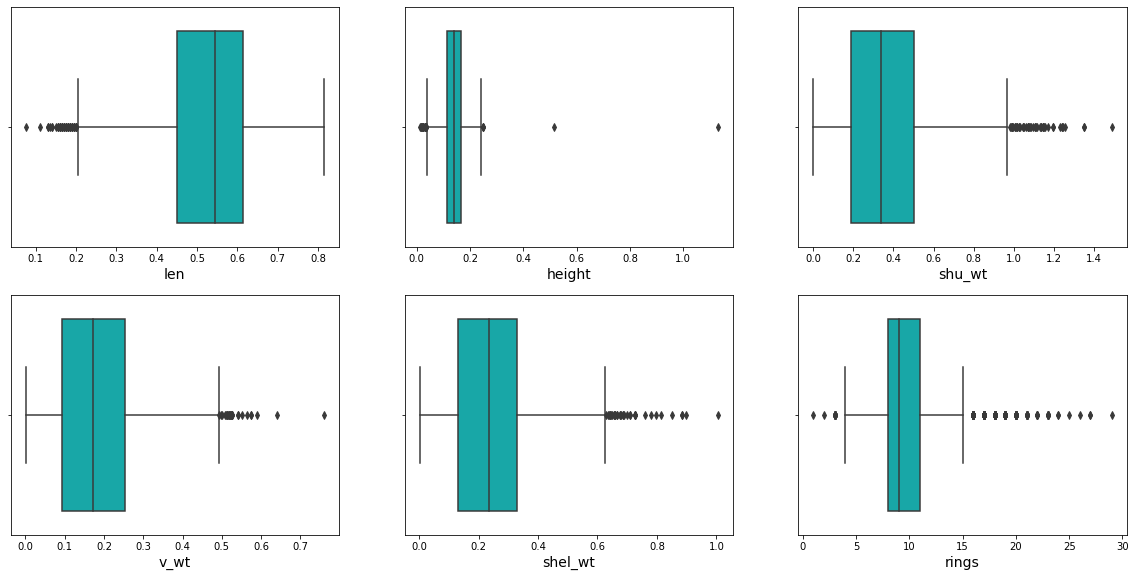

In [34]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=6:
        plt.subplot(3,3,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - as expected all the feature variables and target variable have outliers. lets treat them with the help of z score method

# Removing Outliers

In [35]:
#using z-score method
from scipy.stats import zscore #import zscore from spipy library
zscore(df)

,len,height,shu_wt,v_wt,shel_wt,rings
0,-0.574558,-1.068874,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.188748,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,-0.109881,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.349630,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.428497,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...
4172,0.341509,0.609363,0.047908,0.532900,0.073062,0.330765
4173,0.549706,-0.109881,0.358808,0.309362,0.155685,0.020571
4174,0.632985,1.568356,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.249741,0.773341,0.733627,0.410739,0.020571


In [36]:
z = np.abs(zscore(df))
z.shape

(4177, 6)

In [37]:
np.where(z>3) #detecting outliers where z>3

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
         167,  168,  170,  181,  232,  236,  236,  237,  238,  239,  270,
         275,  277,  278,  294,  310,  313,  314,  334,  351,  355,  358,
         362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
         526,  530,  572,  628,  673,  674,  675,  678,  696,  719,  720,
         744,  754,  756,  811,  891,  891, 1048, 1051, 1193, 1197, 1199,
        1202, 1204, 1206, 1206, 1207, 1207, 1207, 1209, 1417, 1417, 1418,
        1422, 1426, 1427, 1427, 1428, 1429, 1528, 1754, 1756, 1757, 1759,
        1761, 1762, 1762, 1763, 1763, 1821, 1982, 1986, 1987, 2051, 2090,
        2108, 2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2335, 2344, 2358, 2368, 2381, 2436,
        2459, 2471, 2544, 2624, 2624, 2625, 2709, 2710, 2710, 2810, 2810,
        2811, 2811, 2862, 2863, 2863, 3007, 3008, 3140, 3148, 3149, 3149,
        3151, 3151, 3188, 3193, 3280, 

In [38]:
z.iloc[2114] #checking one of the detected outliers

len        3.281120
height     2.507364
shu_wt     1.596708
v_wt       1.588429
shel_wt    1.690765
rings      1.840597
Name: 2114, dtype: float64

In [39]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

166

This means 166 out of 4177 row need to be removed to treat outliers

In [40]:
#removing outliers

df_new = df_enc[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (4177, 6)
New Data Frame: (4034, 9)
Total Dropped Rows: 143


In [41]:
#percent loss
percent_loss = 143*100/4177
print("Percent Loss: ",percent_loss)

Percent Loss:  3.423509695954034


There is a total 3.42% data loss which is acceptable.

In [42]:
df_new

,len,height,shu_wt,v_wt,shel_wt,rings,F,I,M
0,0.455,0.095,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.090,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.135,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.125,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.080,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.165,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.135,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.205,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.150,0.5310,0.2610,0.2960,10,1,0,0


# Checking Outliers again using boxplot

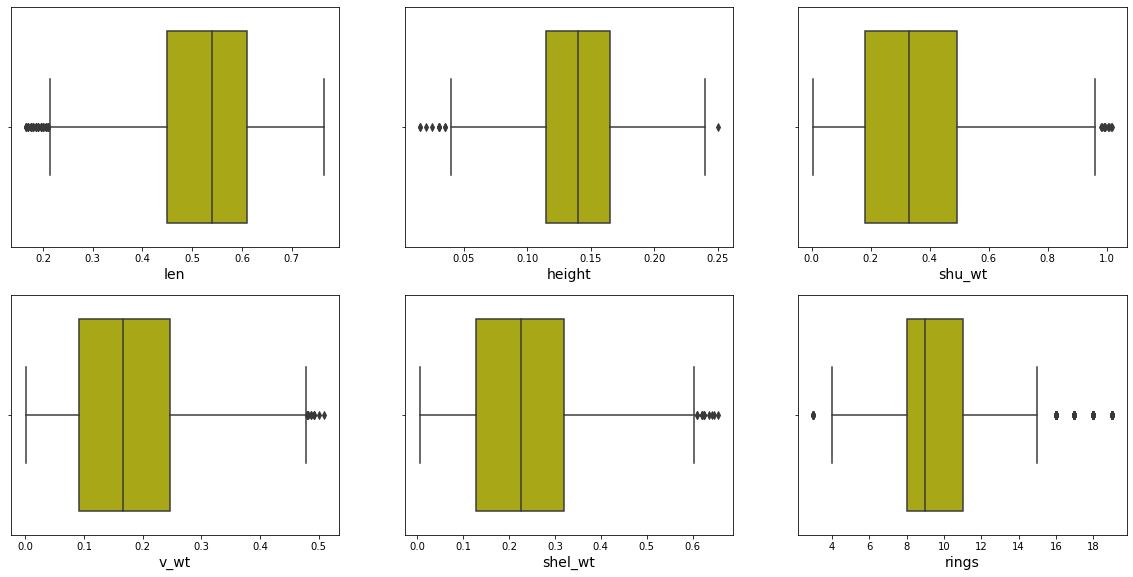

In [43]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=6:
        plt.subplot(3,3,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers have been treated to some extent. Lets implement IQR method to treat outliers

# Treating Outliers using IQR method

In [44]:
q1= df_new.quantile(.25)
q3= df_new.quantile(.75)
iqr=q3-q1

index=np.where(df_new['len'] < (q1.len - (1.5 * iqr.len)))
df_new=df_new.drop(df_new.index[index])

index=np.where(df_new['height'] < (q1.height - (1.5 * iqr.height)))
df_new=df_new.drop(df_new.index[index])

index=np.where(df_new['shu_wt'] < (q1.shu_wt - (1.5 * iqr.shu_wt)))
df_new=df_new.drop(df_new.index[index])

index=np.where(df_new['v_wt'] < (q1.v_wt - (1.5 * iqr.v_wt)))
df_new=df_new.drop(df_new.index[index])

index=np.where(df_new['shel_wt'] < (q1.shel_wt - (1.5 * iqr.shel_wt)))
df_new=df_new.drop(df_new.index[index])

index=np.where(df_new['rings'] < (q1.rings - (1.5 * iqr.rings)))
df_new=df_new.drop(df_new.index[index])

df_new.reset_index()
df_new.head()

,len,height,shu_wt,v_wt,shel_wt,rings,F,I,M
0,0.455,0.095,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.090,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.135,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.125,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.080,0.0895,0.0395,0.055,7,0,1,0


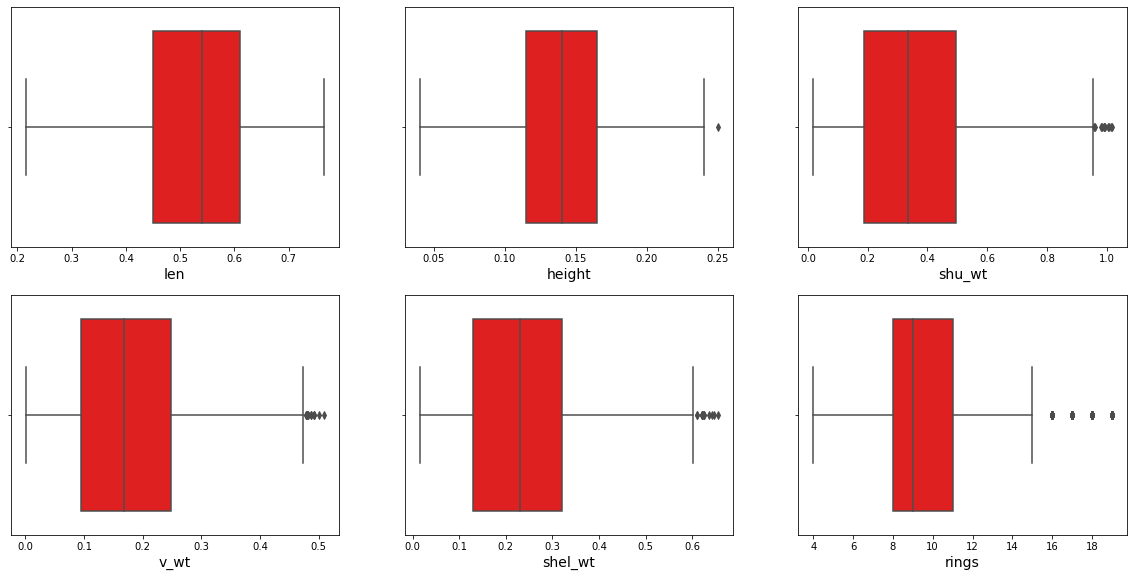

In [45]:
#plotting the boxplot again
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=6:
        plt.subplot(3,3,plotnum)
        sns.boxplot(df_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

In [46]:
df_new.shape

(3985, 9)

# Data Separation (Separating Feature and Traget Variable)

In [47]:
#independent variable
x = df_new.drop(['rings'],axis=1)
x

,len,height,shu_wt,v_wt,shel_wt,F,I,M
0,0.455,0.095,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.090,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.135,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.125,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.080,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...
4172,0.565,0.165,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.135,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.205,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.150,0.5310,0.2610,0.2960,1,0,0


In [48]:
#dependent variable
y = df_new['rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 3985, dtype: int64

# Balancing Target Variable (SMOTE)

In [49]:
y.value_counts()

9     685
10    626
8     567
11    472
7     390
6     255
12    253
13    199
14    119
15    102
5     101
16     62
17     53
18     39
19     32
4      30
Name: rings, dtype: int64

<AxesSubplot:xlabel='rings', ylabel='count'>

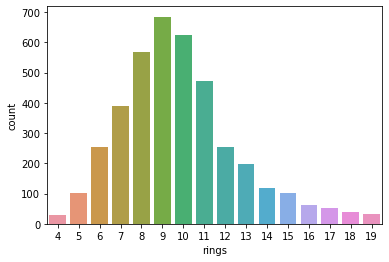

In [50]:
sns.countplot(y)

In [51]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(x,y,)
X,Y


(            len    height    shu_wt      v_wt   shel_wt  F  I  M
 0      0.455000  0.095000  0.224500  0.101000  0.150000  0  0  1
 1      0.350000  0.090000  0.099500  0.048500  0.070000  0  0  1
 2      0.530000  0.135000  0.256500  0.141500  0.210000  1  0  0
 3      0.440000  0.125000  0.215500  0.114000  0.155000  0  0  1
 4      0.330000  0.080000  0.089500  0.039500  0.055000  0  1  0
 ...         ...       ...       ...       ...       ... .. .. ..
 10955  0.609201  0.167428  0.409318  0.223498  0.371342  0  0  1
 10956  0.572379  0.163331  0.355445  0.228493  0.299759  0  0  1
 10957  0.591876  0.160000  0.384607  0.185686  0.320522  0  0  1
 10958  0.545848  0.153114  0.299035  0.154736  0.303393  1  0  0
 10959  0.549007  0.156501  0.329105  0.201356  0.291501  0  0  1
 
 [10960 rows x 8 columns],
 0        15
 1         7
 2         9
 3        10
 4         7
          ..
 10955    19
 10956    19
 10957    19
 10958    19
 10959    19
 Name: rings, Length: 10960, dtype: 

In [52]:
X.shape

(10960, 8)

In [53]:
Y.shape

(10960,)

In [54]:
Y

0        15
1         7
2         9
3        10
4         7
         ..
10955    19
10956    19
10957    19
10958    19
10959    19
Name: rings, Length: 10960, dtype: int64

<AxesSubplot:xlabel='rings', ylabel='count'>

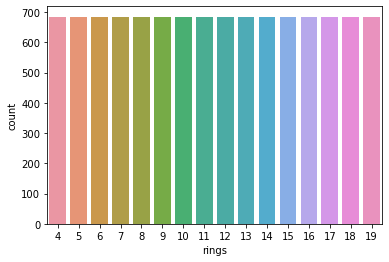

In [55]:
sns.countplot(Y)

Target data has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [56]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [57]:
X

array([[-0.62401074, -1.08774194, -0.47462911, ..., -0.68812382,
        -0.67950212,  1.34733423],
       [-1.27220815, -1.18449256, -1.19223503, ..., -0.68812382,
        -0.67950212,  1.34733423],
       [-0.03377654, -0.21908394, -0.30450085, ...,  1.45322684,
        -0.67950212, -0.74220633],
       ...,
       [ 0.54666851,  0.41791631,  0.32960624, ..., -0.68812382,
        -0.67950212,  1.34733423],
       [ 0.1063698 ,  0.23465273, -0.08596746, ...,  1.45322684,
        -0.67950212, -0.74220633],
       [ 0.13498837,  0.32404189,  0.06358733, ..., -0.68812382,
        -0.67950212,  1.34733423]])

In [58]:
X.ndim

2

In [59]:
X.mean()

-1.0372886653432119e-16

so now the mean is almost 0, hence data is normalized

In [60]:
X.std()

1.0

In [61]:
X.shape

(10960, 8)

and Standard deviation is 1 so data is normalized now

# Feature Scaling using Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2,3,4,5,6,7
0,-0.624011,-1.087742,-0.474629,-0.662856,-0.631883,-0.688124,-0.679502,1.347334
1,-1.272208,-1.184493,-1.192235,-1.222852,-1.221911,-0.688124,-0.679502,1.347334
2,-0.033777,-0.219084,-0.304501,-0.258095,-0.206479,1.453227,-0.679502,-0.742206
3,-0.728563,-0.452799,-0.523406,-0.530476,-0.595895,-0.688124,-0.679502,1.347334
4,-1.375170,-1.370693,-1.253687,-1.323183,-1.335672,-0.688124,1.471666,-0.742206
...,...,...,...,...,...,...,...,...
10955,0.725867,0.622542,0.444105,0.497651,0.873975,-0.688124,-0.679502,1.347334
10956,0.353957,0.508773,0.191403,0.541171,0.405292,-0.688124,-0.679502,1.347334
10957,0.546669,0.417916,0.329606,0.159108,0.542915,-0.688124,-0.679502,1.347334
10958,0.106370,0.234653,-0.085967,-0.130550,0.429486,1.453227,-0.679502,-0.742206


In [63]:
X.shape

(10960, 8)

# Regression Model Building

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [65]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('training accuracy :',acc_train,'test accuracy is :',acc_test,'random_state is:',i)

training accuracy : 0.26800486618004865 test accuracy is : 0.25437956204379564 random_state is: 199


So Logistic regression is showing best accuracy score at 199 random stage

# Creating the Training and Testing data set

In [66]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=199, test_size=0.25)

# Machine Learning Model

In [80]:

def reg_func(model, X, Y):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #accracy score
    print('Accuracy :',accuracy_score(y_test,pred))
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=4)
    print('Cross validation score :',cvs.mean())
    
    #difference in accuracy and cross validation score
    print('Accuracy and CV Score Diff :', abs(accuracy_score(y_test,pred) - cvs.mean()))
    
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=pred_test, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual Rings', fontsize = 14)
    plt.ylabel('Predicted Rings', fontsize = 14)
   # plt.title('Linear Regression',fontsize=10)
    plt.show()

# Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           4       0.65      0.83      0.73       171
           5       0.47      0.44      0.45       172
           6       0.29      0.38      0.33       156
           7       0.31      0.36      0.33       166
           8       0.29      0.38      0.33       175
           9       0.24      0.15      0.18       198
          10       0.12      0.10      0.11       170
          11       0.23      0.35      0.28       164
          12       0.10      0.12      0.10       164
          13       0.17      0.11      0.13       173
          14       0.10      0.04      0.06       173
          15       0.14      0.15      0.15       173
          16       0.20      0.31      0.25       173
          17       0.15      0.19      0.16       149
          18       0.26      0.07      0.11       193
          19       0.15      0.14      0.14       170

    accuracy                           0.25      2740
 

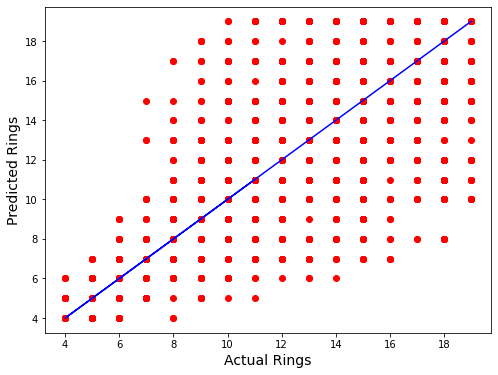

In [81]:
reg_func(LogisticRegression(),X,Y)

# Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           4       0.90      0.89      0.90       171
           5       0.77      0.73      0.75       172
           6       0.57      0.66      0.61       156
           7       0.43      0.48      0.45       166
           8       0.34      0.31      0.33       175
           9       0.19      0.15      0.17       198
          10       0.28      0.28      0.28       170
          11       0.30      0.31      0.31       164
          12       0.49      0.50      0.49       164
          13       0.52      0.48      0.50       173
          14       0.61      0.64      0.63       173
          15       0.58      0.61      0.59       173
          16       0.73      0.74      0.74       173
          17       0.71      0.74      0.72       149
          18       0.78      0.72      0.74       193
          19       0.74      0.77      0.75       170

    accuracy                           0.56      2740
 

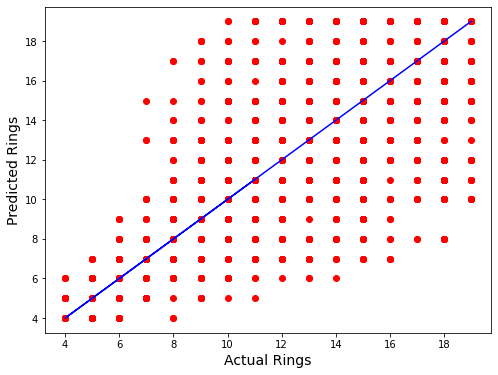

In [82]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(), X, Y)

# Random Forest Classifier

Classification Report :
               precision    recall  f1-score   support

           4       0.90      0.95      0.92       171
           5       0.82      0.90      0.86       172
           6       0.65      0.71      0.68       156
           7       0.60      0.66      0.63       166
           8       0.45      0.45      0.45       175
           9       0.30      0.21      0.25       198
          10       0.35      0.27      0.31       170
          11       0.48      0.41      0.44       164
          12       0.61      0.64      0.63       164
          13       0.69      0.68      0.69       173
          14       0.79      0.80      0.80       173
          15       0.78      0.84      0.81       173
          16       0.82      0.86      0.84       173
          17       0.74      0.89      0.81       149
          18       0.85      0.82      0.83       193
          19       0.81      0.90      0.85       170

    accuracy                           0.68      2740
 

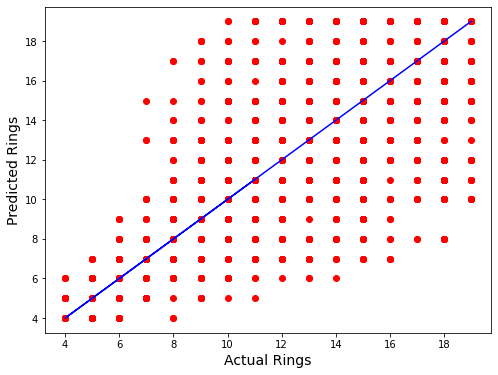

In [83]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(), X, Y)

# SVC

Classification Report :
               precision    recall  f1-score   support

           4       0.60      0.85      0.71       171
           5       0.42      0.35      0.38       172
           6       0.30      0.39      0.34       156
           7       0.31      0.34      0.32       166
           8       0.29      0.32      0.30       175
           9       0.27      0.23      0.25       198
          10       0.22      0.19      0.21       170
          11       0.25      0.27      0.26       164
          12       0.13      0.12      0.13       164
          13       0.32      0.03      0.06       173
          14       0.27      0.17      0.21       173
          15       0.24      0.24      0.24       173
          16       0.36      0.18      0.24       173
          17       0.28      0.30      0.29       149
          18       0.40      0.45      0.42       193
          19       0.28      0.61      0.39       170

    accuracy                           0.32      2740
 

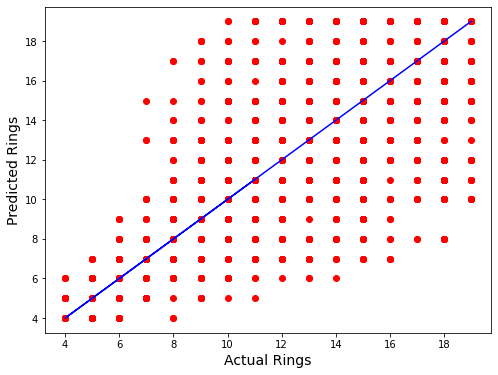

In [84]:
from sklearn.svm import SVC
reg_func(SVC(),X,Y)

# Extra Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           4       0.92      0.95      0.93       171
           5       0.85      0.94      0.90       172
           6       0.72      0.78      0.75       156
           7       0.62      0.70      0.66       166
           8       0.45      0.41      0.43       175
           9       0.25      0.18      0.21       198
          10       0.36      0.27      0.31       170
          11       0.49      0.43      0.46       164
          12       0.65      0.64      0.64       164
          13       0.73      0.74      0.73       173
          14       0.79      0.79      0.79       173
          15       0.78      0.84      0.81       173
          16       0.83      0.90      0.86       173
          17       0.79      0.92      0.85       149
          18       0.88      0.85      0.86       193
          19       0.81      0.93      0.87       170

    accuracy                           0.70      2740
 

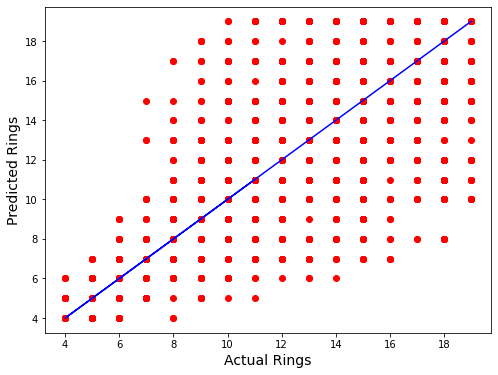

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
reg_func(ExtraTreesClassifier(), X,Y)

Observation - Extra Tree Classifier is giving the highest accracy 68% and least difference between accuracy and cross validation score. So we continue with Extra Tree Classifier for Hyper Parameter Tuning.

# Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],"max_depth":['auto',2,4,6,8,10],'n_estimators':list(range(0,100))}
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 89}

In [75]:
GCV.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=89)

In [78]:
etc = ExtraTreesClassifier(criterion='entropy', max_depth=10)
reg_func(etc,X,Y)

Classification Report :
               precision    recall  f1-score   support

           4       0.74      0.92      0.82       171
           5       0.63      0.56      0.60       172
           6       0.38      0.52      0.44       156
           7       0.44      0.40      0.42       166
           8       0.33      0.43      0.38       175
           9       0.29      0.16      0.21       198
          10       0.26      0.17      0.20       170
          11       0.35      0.29      0.32       164
          12       0.54      0.30      0.39       164
          13       0.53      0.28      0.37       173
          14       0.60      0.47      0.53       173
          15       0.57      0.62      0.60       173
          16       0.64      0.69      0.66       173
          17       0.52      0.75      0.62       149
          18       0.58      0.66      0.62       193
          19       0.47      0.79      0.59       170

    accuracy                           0.50      2740
 

Accuracy Score 50%

# Saving the final Model

In [86]:
import pickle
filename = 'abalone_case_study.pkl'
pickle.dump(etc,open(filename,'wb'))

# Conclusion

In [87]:
loaded_model = pickle.load(open('abalone_case_study.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

49.96350364963504


In [88]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739
Predicted,11,9,19,17,17,6,12,7,6,17,...,18,11,18,19,14,15,16,5,18,19
Original,11,9,19,15,12,10,12,7,6,11,...,18,11,14,14,18,17,16,4,18,19


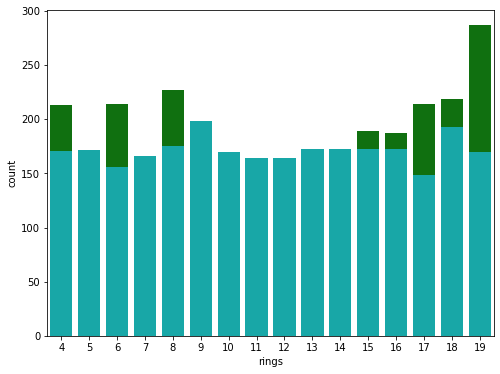

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(x=loaded_model.predict(x_test)[:], color='g')
sns.countplot(x=y_test[:], color='c')
plt.show()

# This model is only 50% accurate